# Advance LinearRegression Technique

# Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

# load our dataset

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# Information regrading our data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
y_price = train['SalePrice'] #this is our target column

# removing unwanted features

In [6]:
train.drop("SalePrice", axis=1,inplace=True)
train.drop("Alley", axis=1,inplace=True)
train.drop("Fence", axis=1,inplace=True)
train.drop("PoolQC", axis=1,inplace=True)
train.drop("FireplaceQu", axis=1,inplace=True)
train.drop("MiscFeature", axis=1,inplace=True)
train.drop("Id", axis=1,inplace=True)

In [7]:
test_id=test['Id']

In [8]:

test.drop("Alley", axis=1,inplace=True)
test.drop("Fence", axis=1,inplace=True)
test.drop("PoolQC", axis=1,inplace=True)
test.drop("FireplaceQu", axis=1,inplace=True)
test.drop("MiscFeature", axis=1,inplace=True)
test.drop("Id", axis=1,inplace=True)

# Seperating categorical and numerical data

In [9]:
train_cat = train.select_dtypes(object)
train_num = train.select_dtypes(["int64","float64"])

In [10]:
test_cat = test.select_dtypes(object)
test_num = test.select_dtypes(["int64","float64"])

# Filling data where value is not provided

In [11]:
for col in train_num:
    if train[col].isnull().sum():
        col_mean = train[col].mean()
        train[col]=train[col].fillna(col_mean)
        
for col in train_cat:
    if train[col].isnull().sum():
        train[col] = train[col].fillna(method="ffill") # fill NaN value with what previous raw have their values


train_cat = train.select_dtypes(object)
train_num = train.select_dtypes(["int64","float64"])

In [12]:
for col in test_num:
    if test[col].isnull().sum():
        col_mean = test[col].mean()
        test[col]=test[col].fillna(col_mean)
        
for col in test_cat:
    if test[col].isnull().sum():
        test[col] = test[col].fillna(method="ffill") # fill NaN value with what previous raw have their values


test_cat = test.select_dtypes(object)
test_num = test.select_dtypes(["int64","float64"])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Changing categorical data into numerical data

In [14]:
for col in train_cat:
    le = LabelEncoder()
    train[col]=le.fit_transform(train_cat[col])

In [15]:
for col in test_cat:
    le = LabelEncoder()
    test[col]=le.fit_transform(test_cat[col])

In [16]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Removing skewness from our data

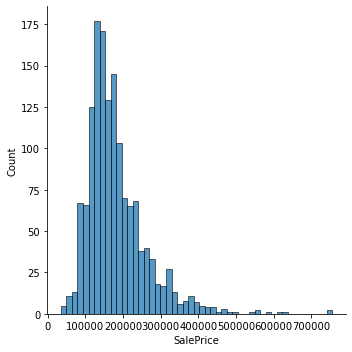

In [18]:
sns.displot(y_price)

In [19]:
print("Skewness: %f" % y_price.skew())

Skewness: 1.882876


In [20]:
for col in train_num:
    train[col] = np.log1p(train[col])

In [21]:
for col in test_num:
    test[col] = np.log1p(test[col])

In [22]:
train.shape,y_price.shape

((1460, 74), (1460,))

# Split Our data

In [23]:
x_train,x_test,y_train,y_test=train_test_split(train,y_price,random_state=64)

# Simple Linear regression 

In [24]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7629338861593911

# using XGBoost Regressor

In [25]:
import xgboost as XGB

model_b = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)


model_b.fit(x_train,y_train)
model_b.score(x_test,y_test)

0.886825741743739

In [26]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.044522,2,4.394449,9.360741,1,3,3,0,4,0,...,0.000000,0.0,0.0,4.795791,0.0,0.000000,1.945910,7.606387,8,4
1,3.044522,3,4.406719,9.565775,1,0,3,0,0,0,...,3.610918,0.0,0.0,0.000000,0.0,9.433564,1.945910,7.606387,8,4
2,4.110874,3,4.317488,9.534668,1,0,3,0,4,0,...,3.555348,0.0,0.0,0.000000,0.0,0.000000,1.386294,7.606387,8,4
3,4.110874,3,4.369448,9.208238,1,0,3,0,4,0,...,3.610918,0.0,0.0,0.000000,0.0,0.000000,1.945910,7.606387,8,4
4,4.795791,3,3.784190,8.518392,1,0,1,0,4,0,...,4.418841,0.0,0.0,4.976734,0.0,0.000000,0.693147,7.606387,8,4


# 

# saving results in csv file of our test data

In [27]:
y_predict = model_b.predict(test)
my_file = pd.DataFrame()
my_file['Id'] = test_id
my_file['SalePrice'] = y_predict

In [28]:
my_file.to_csv('my_ans_git_1.csv',index=False)